## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/train_data_complete.csv")

In [3]:
print(data.shape)
data.head()

(762, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [6]:
data.dtypes

Date     datetime64[ns]
count             int64
dtype: object

In [5]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

data.index = data['Date']

# Exploring the Data

In [7]:
data.shape

(762, 2)

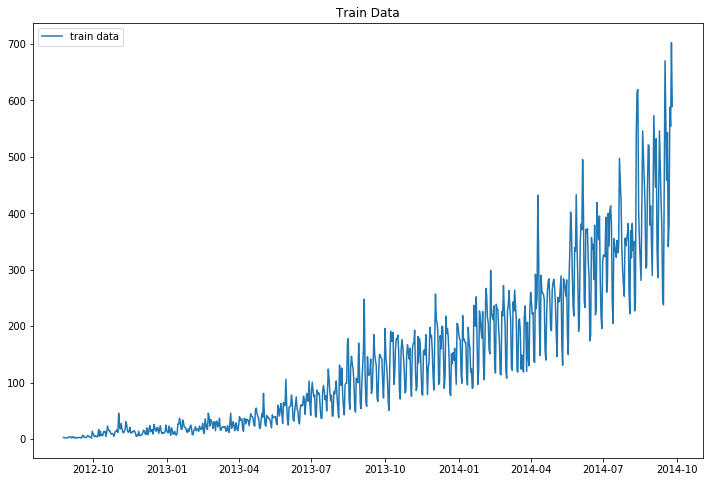

In [8]:
plt.figure(figsize=(12,8))

plt.plot(data.Date, data['count'], label='train data')

plt.legend(loc='best')
plt.title("Train Data")
plt.show()

### Check for Missing Values

In [9]:
data.shape

(762, 2)

In [10]:
data['Date'].min(), data['Date'].max()

(Timestamp('2012-08-25 00:00:00'), Timestamp('2014-09-25 00:00:00'))

In [11]:
data['Date'].max() - data['Date'].min()

Timedelta('761 days 00:00:00')

- No missing values in the data

In [12]:
data.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


- We have the daily level data. Let us find out if there is any pattern in the data. 
    - Is the count high on any particular day of the week?
    - Will the weekend have any effect on the count?
    - Is the count higher/ lower on particular month of the year?
    - How is the count changing over the years? Is it increasing or decreasing or constant?

In [13]:
data['Date'].dt.year.head()

Date
2012-08-25    2012
2012-08-26    2012
2012-08-27    2012
2012-08-28    2012
2012-08-29    2012
Name: Date, dtype: int64

In [14]:
data['Date'].dt.day.head()

Date
2012-08-25    25
2012-08-26    26
2012-08-27    27
2012-08-28    28
2012-08-29    29
Name: Date, dtype: int64

In [15]:
data['Date'].dt.dayofweek.head()

Date
2012-08-25    5
2012-08-26    6
2012-08-27    0
2012-08-28    1
2012-08-29    2
Name: Date, dtype: int64

The day of the week with Monday=0, Sunday=6.

# Adding features to the data

In [16]:
data_feat = pd.DataFrame({"year": data['Date'].dt.year,
                          "month": data['Date'].dt.month,
                          "day": data['Date'].dt.day,
                          "dayofyear": data['Date'].dt.dayofyear,
                          "week": data['Date'].dt.week,
                          "weekday": data['Date'].dt.dayofweek,
                          "quarter": data['Date'].dt.quarter,
                         })
data_feat.head()

,year,month,day,dayofyear,week,weekday,quarter
Date,,,,,,,
2012-08-25,2012,8,25,238,34,5,3
2012-08-26,2012,8,26,239,34,6,3
2012-08-27,2012,8,27,240,35,0,3
2012-08-28,2012,8,28,241,35,1,3
2012-08-29,2012,8,29,242,35,2,3


In [17]:
complete_data = pd.concat([data_feat, data['count']], axis=1)
complete_data.head()

,year,month,day,dayofyear,week,weekday,quarter,count
Date,,,,,,,,
2012-08-25,2012,8,25,238,34,5,3,3
2012-08-26,2012,8,26,239,34,6,3,3
2012-08-27,2012,8,27,240,35,0,3,2
2012-08-28,2012,8,28,241,35,1,3,2
2012-08-29,2012,8,29,242,35,2,3,2


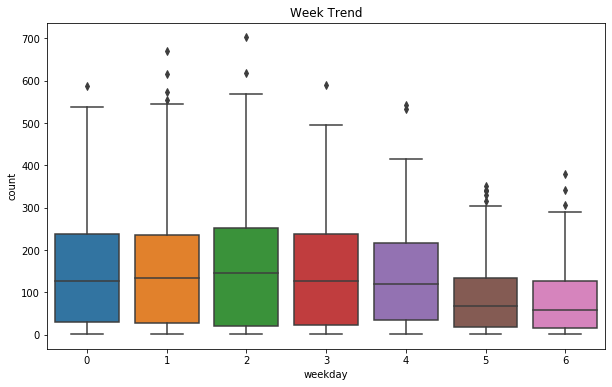

In [18]:
# boxplot for week's count
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['weekday'], y=complete_data['count'], )
plt.title('Week Trend')
plt.show()

- The count is lower on the weekends (saturday and sunday)
- Average count is higher on the weekdays

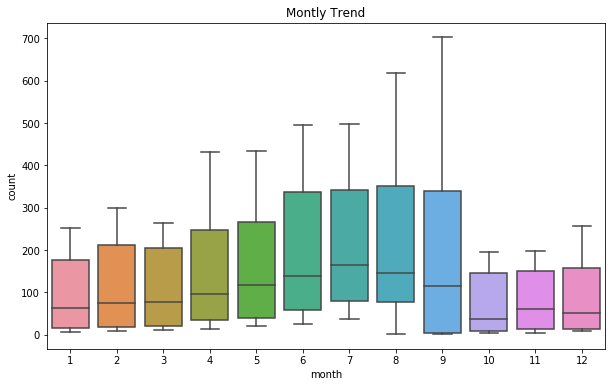

In [19]:
# boxplot for month's count
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['month'], y=complete_data['count'], )
plt.title('Montly Trend')
plt.show()

- The first and the last months have observed a significantly lower average count. 

Let us check the average for each quarter.

In [20]:
quarter_average = pd.DataFrame(complete_data.groupby('quarter')['count'].mean())
quarter_average

,count
quarter,
1,101.700000
2,159.324176
3,201.601852
4,79.630435


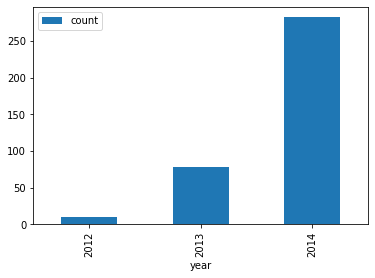

In [21]:
yearly_average = pd.DataFrame(complete_data.groupby('year')['count'].mean())
yearly_average
yearly_average.plot(kind='bar')